In [27]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-shows/netflix_titles.csv


# importing  all the libraries first

In [28]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
warnings. filterwarnings('ignore')

# loading the dataset 

In [29]:
df = pd.read_csv('/kaggle/input/netflix-shows/netflix_titles.csv')
df.head()
                 

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [30]:
df = df[['title', 'listed_in', 'rating', 'duration']].dropna()
df.columns

Index(['title', 'listed_in', 'rating', 'duration'], dtype='object')

In [31]:
def extract_duration(x):
    if isinstance(x, str):
        if 'min' in x:
            return int(x.split(' ')[0])
        else:
            return 0  # TV Shows or unknown format
    return 0 

In [32]:
df['duration'] = df['duration'].apply(extract_duration)


In [33]:
df['genre'] = df['listed_in'].apply(lambda x : x.split(',')[0])
df = pd.get_dummies(df , columns = ['genre', 'rating'])

# Normalizing the duration 

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['duration'] = scaler.fit_transform(df[['duration']])

In [36]:
from sklearn.cluster import KMeans
X = df.drop(['title', 'listed_in'], axis = 1)

In [37]:
kmeans = KMeans(n_clusters = 5 , random_state = 42)
df['cluster'] = kmeans.fit_predict(X)

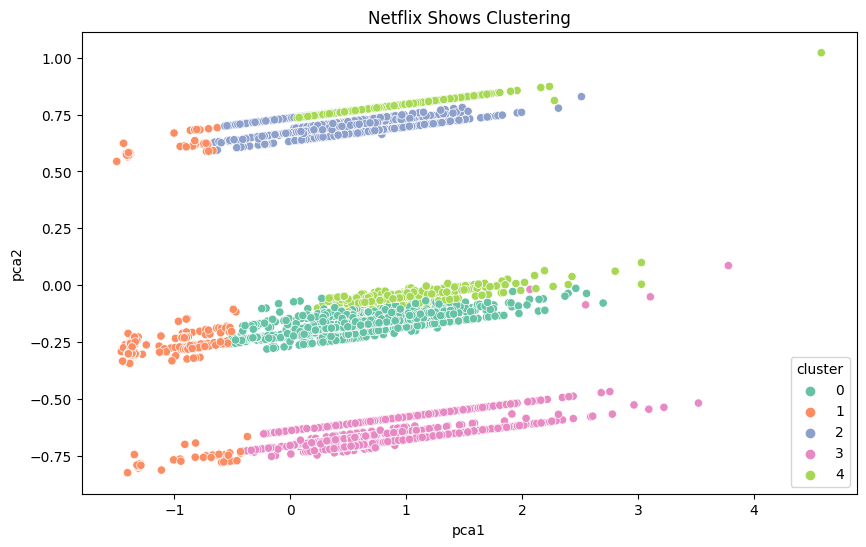

In [41]:
from sklearn.decomposition import PCA 
pca = PCA(n_components = 2)
components = pca.fit_transform(X)
df['pca1'] = components[:,0]

df['pca2'] = components[:,1]
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='pca1', y='pca2', hue='cluster', palette='Set2')
plt.title("Netflix Shows Clustering")
plt.show()

In [43]:
# Only include numeric columns in mean aggregation
df.groupby('cluster').mean(numeric_only=True)


,duration,genre_Action & Adventure,genre_Anime Features,genre_Anime Series,genre_British TV Shows,genre_Children & Family Movies,genre_Classic & Cult TV,genre_Classic Movies,genre_Comedies,genre_Crime TV Shows,...,rating_TV-14,rating_TV-G,rating_TV-MA,rating_TV-PG,rating_TV-Y,rating_TV-Y7,rating_TV-Y7-FV,rating_UR,pca1,pca2
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.528500,0.228792,0.008740,0.000000,0.000000,0.265810,0.000000,0.024165,0.212853,0.000000,...,0.000000,0.050900,0.000000,0.202057,0.035990,0.060154,0.002571,0.000514,0.556193,-0.169678
1,-1.307693,0.001044,0.000696,0.060891,0.088031,0.024356,0.007655,0.001740,0.003479,0.138831,...,0.267223,0.037926,0.407446,0.124913,0.082463,0.075157,0.000348,0.000000,-1.358116,-0.072746
2,0.448004,0.141251,0.000703,0.000000,0.000000,0.000703,0.000000,0.007027,0.278988,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.385358,0.693148
3,0.839507,0.150430,0.000716,0.000000,0.000000,0.012178,0.000000,0.012178,0.278653,0.000000,...,0.997135,0.000716,0.000000,0.001433,0.000000,0.000000,0.000000,0.000000,0.899576,-0.642686
4,0.792526,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000861,0.000000,0.000000,...,0.000000,0.009466,0.527539,0.093804,0.000000,0.000861,0.000000,0.001721,0.875437,0.387207
